Data downloaded from https://datadryad.org/stash/dataset/doi:10.5061/dryad.4ch10 It's retinal ganglion cell data from 38 neurons.

In [23]:
from scipy import io
import numpy as np
import elephant
import neo
from quantities import ms, s, kHz
import matplotlib.pyplot as plt
import elephant.conversion as conv
import scipy.fftpack
import neo
import quantities as pq

dat=io.loadmat('/media/maria/DATA1/Documents/NeuralData/RetinaDataFactorizationsOfPopulationSpikeTrains/NeuralData/Spikes/Movie1Exp1.mat')

In [6]:
print(dat['Spikes'].shape)
print(dat['n_trials'])

(38, 30)
[[30]]


In [13]:
all_trials_spks=list(dat['Spikes'][0][0].flatten())
for j in range(1,dat['n_trials'][0][0]):
    spike_train=list(dat['Spikes'][0][j].flatten())+all_trials_spks[-1]
    all_trials_spks=list(all_trials_spks)+list(spike_train)
print(all_trials_spks)

[660, 700, 3290, 3639, 3992, 5928, 5938, 5952, 5965, 5983, 6477, 6853, 7480, 7498, 8736, 9306, 9938, 10852, 10889, 11884, 12301, 12793, 12880, 13585, 16608, 16628, 18292, 18789, 18810, 18826, 18840, 18871, 20366, 20380, 21671, 22783, 23735, 23784, 25211, 25678, 29333, 31603, 31614, 31625, 31644, 31664, 31677, 32074, 32550, 33159, 33177, 35059, 36544, 36562, 36620, 38000, 38010, 38486, 42204, 44406, 44433, 44448, 44458, 44486, 47246, 47337, 48413, 49373, 49385, 50799, 51266, 54987, 55004, 56669, 56688, 57191, 57208, 57245, 57265, 60134, 60601, 62138, 62193, 63580, 63600, 64057, 67744, 69495, 69986, 69997, 70011, 70037, 71555, 72877, 72929, 73384, 74923, 76375, 76856, 76863, 77563, 80566, 82294, 82789, 82804, 82822, 82834, 82848, 84348, 84363, 86224, 87734, 87795, 88802, 89643, 90349, 93331, 93367, 95569, 95592, 95611, 95621, 95632, 98514, 99618, 100528, 100568, 101950, 101982, 102435, 106112, 106146, 108338, 108353, 108392, 108410, 108945, 109324, 111738, 113309, 113332, 114746, 115248,

In [57]:
def bin_spike_train(spike_train,bin_size_in_ms):
    spk_tr = neo.SpikeTrain(spike_train*ms, t_stop=spike_train[-1]*ms)
    start=spike_train[0]
    end=spike_train[-1]
    binned_spk_tr = conv.BinnedSpikeTrain(spk_tr, binsize=bin_size_in_ms*pq.ms,
                                    t_start=start*pq.ms,t_stop=end*pq.ms)
    binned_spk_tr=binned_spk_tr.to_array().flatten()
    #plt.plot(binned_spk_tr)
    #plt.title('Binned spikes, bin size in ms: '+str(bin_size_in_ms))
    #plt.show()
    return binned_spk_tr
binned_spk_tr=bin_spike_train(all_trials_spks,500)

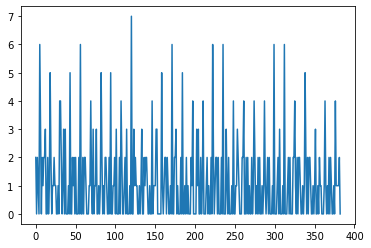

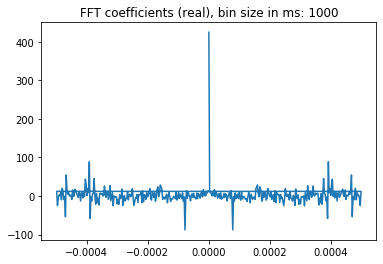

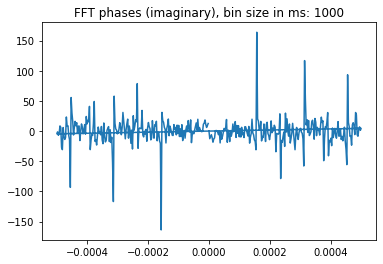

In [50]:
def fourier_transform(binned_spk_tr,bin_size):
    sp = np.fft.fft(binned_spk_tr)
    n=binned_spk_tr.flatten().shape[0]
    freq = np.fft.fftfreq(n,d=bin_size)
    plt.plot(freq, sp.real)
    plt.title('FFT coefficients (real), bin size in ms: '+str(bin_size))
    plt.show()
    plt.plot(freq, sp.imag)
    plt.title('FFT phases (imaginary), bin size in ms: '+str(bin_size))
    plt.show()

bin_size=1000
binned_spk_tr=bin_spike_train(all_trials_spks,bin_size)
fourier_transform(binned_spk_tr,bin_size)
    

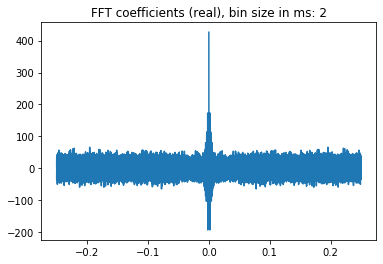

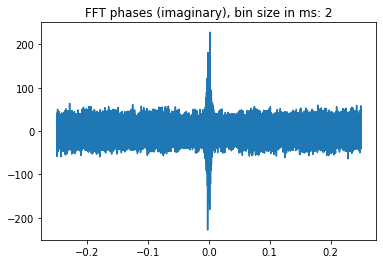

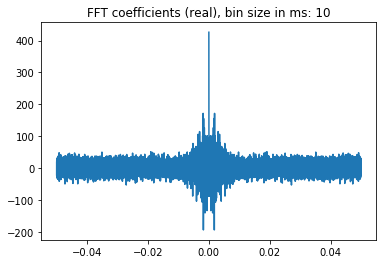

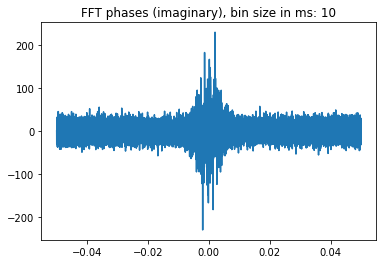

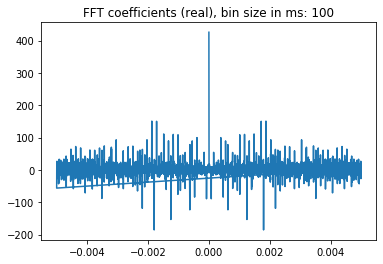

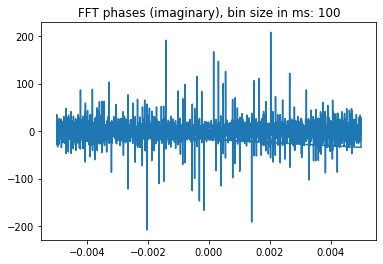

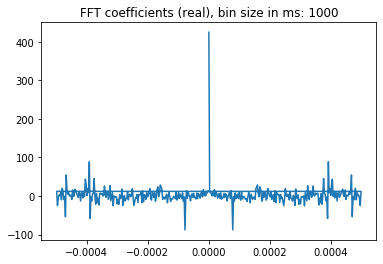

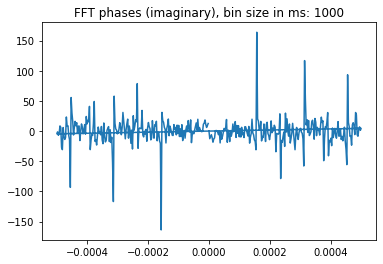

In [58]:
bin_sizes=[2,10,100,1000]
for bin_size in bin_sizes:
    binned_spk_tr=bin_spike_train(all_trials_spks,bin_size)
    fourier_transform(binned_spk_tr,bin_size)